In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [16]:
DATADIR = 'D:/pyinv/v2-plant-seedlings-dataset'

In [19]:
categ = [ item for item in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, item)) ]


In [20]:
categ

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

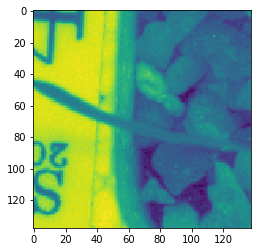

In [24]:
for category in categ:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = img_array / 255 
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # 
    break

In [25]:
print(img_array)

[[0.30980392 0.31372549 0.31372549 ... 0.30980392 0.3372549  0.34509804]
 [0.24313725 0.24705882 0.24705882 ... 0.29803922 0.3372549  0.3372549 ]
 [0.22352941 0.23529412 0.23137255 ... 0.2627451  0.3372549  0.35294118]
 ...
 [0.64313725 0.63921569 0.64313725 ... 0.3372549  0.34901961 0.34901961]
 [0.64313725 0.64705882 0.64705882 ... 0.34117647 0.34117647 0.32941176]
 [0.63137255 0.64705882 0.64705882 ... 0.33333333 0.35294118 0.37647059]]


In [26]:
print(img_array.shape)

(138, 138)


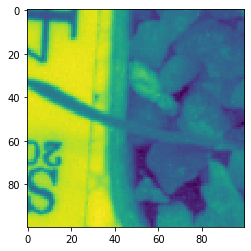

In [27]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [28]:
print(new_array.shape)

(100, 100)


In [30]:
training_data = []

def create_training_data():
    for category in categ:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = categ.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))



  0%|                                              | 0/309 [00:00<?, ?it/s]

  0%|                                      | 1/309 [00:00<01:38,  3.13it/s]

  2%|▌                                     | 5/309 [00:00<01:10,  4.32it/s]

  5%|█▊                                   | 15/309 [00:00<00:48,  6.06it/s]

  7%|██▌                                  | 21/309 [00:00<00:35,  8.20it/s]

  9%|███▎                                 | 28/309 [00:00<00:25, 11.14it/s]

 11%|███▉                                 | 33/309 [00:00<00:19, 14.49it/s]

 13%|████▊                                | 40/309 [00:00<00:14, 18.85it/s]

 15%|█████▌                               | 46/309 [00:01<00:12, 21.18it/s]

 17%|██████▏                              | 52/309 [00:01<00:10, 24.28it/s]

 19%|███████                              | 59/309 [00:01<00:09, 25.02it/s]

 20%|███████▌                             | 63/309 [00:01<00:09, 26.92it/s]

 22%|████████                             | 67/309 [00:01<00:09, 26.35it/s

 58%|████████████████████▏              | 410/713 [00:04<00:02, 114.61it/s]

 63%|█████████████████████▉             | 448/713 [00:04<00:01, 144.71it/s]

 67%|███████████████████████▌           | 480/713 [00:04<00:01, 172.70it/s]

 71%|████████████████████████▉          | 507/713 [00:04<00:01, 183.28it/s]

 75%|██████████████████████████         | 532/713 [00:04<00:01, 147.20it/s]

 78%|███████████████████████████▏       | 553/713 [00:04<00:01, 141.72it/s]

 80%|████████████████████████████       | 572/713 [00:05<00:01, 137.82it/s]

 86%|██████████████████████████████▏    | 616/713 [00:05<00:00, 173.57it/s]

 90%|███████████████████████████████▍   | 641/713 [00:05<00:00, 188.04it/s]

 93%|████████████████████████████████▋  | 666/713 [00:05<00:00, 174.94it/s]

 96%|█████████████████████████████████▊ | 688/713 [00:05<00:00, 162.50it/s]

100%|███████████████████████████████████| 713/713 [00:05<00:00, 125.29it/s]

  0%|                                              | 0/253 [00:00<?, ?it/s]


 10%|███▋                                | 26/257 [00:00<00:01, 132.22it/s]

 13%|████▊                                | 33/257 [00:00<00:03, 65.82it/s]

 15%|█████▌                               | 39/257 [00:00<00:03, 63.49it/s]

 18%|██████▍                              | 45/257 [00:00<00:04, 47.81it/s]

 26%|█████████▊                           | 68/257 [00:00<00:03, 62.67it/s]

 32%|███████████▊                         | 82/257 [00:00<00:02, 73.85it/s]

 36%|█████████████▍                       | 93/257 [00:01<00:02, 72.13it/s]

 40%|██████████████▍                     | 103/257 [00:01<00:02, 69.42it/s]

 44%|███████████████▋                    | 112/257 [00:01<00:03, 40.65it/s]

 54%|███████████████████▌                | 140/257 [00:01<00:02, 54.58it/s]

 60%|█████████████████████▋              | 155/257 [00:01<00:01, 65.86it/s]

 65%|███████████████████████▌            | 168/257 [00:02<00:01, 76.25it/s]

 70%|█████████████████████████▎          | 181/257 [00:02<00:01, 63.63it/s]


 94%|█████████████████████████████████▋  | 433/463 [00:05<00:00, 59.61it/s]

 95%|██████████████████████████████████▏ | 440/463 [00:05<00:00, 61.13it/s]

 97%|██████████████████████████████████▊ | 447/463 [00:05<00:00, 55.93it/s]

 98%|███████████████████████████████████▎| 454/463 [00:05<00:00, 45.93it/s]

 99%|███████████████████████████████████▊| 460/463 [00:05<00:00, 38.58it/s]

100%|████████████████████████████████████| 463/463 [00:06<00:00, 76.58it/s]

5265


In [32]:
import random
random.shuffle(training_data)
print(training_data[:10])


[[array([[55, 69, 78, ..., 92, 99, 99],
       [66, 84, 79, ..., 76, 87, 94],
       [76, 92, 77, ..., 68, 77, 80],
       ...,
       [63, 68, 72, ..., 96, 95, 86],
       [57, 65, 69, ..., 95, 94, 89],
       [46, 56, 64, ..., 94, 96, 91]], dtype=uint8), 8], [array([[ 69,  67,  72, ..., 100,  98,  97],
       [ 64,  62,  65, ...,  98,  94,  97],
       [ 67,  65,  61, ..., 100,  96,  95],
       ...,
       [ 61,  59,  66, ...,  63,  69,  65],
       [ 62,  67,  69, ...,  63,  64,  65],
       [ 65,  70,  70, ...,  60,  65,  68]], dtype=uint8), 3], [array([[ 82,  87,  82, ...,  52,  44,  40],
       [ 83,  97, 101, ...,  52,  47,  48],
       [ 90, 103, 111, ...,  52,  51,  54],
       ...,
       [ 77,  52,  32, ...,  73,  56,  58],
       [ 81,  75,  57, ...,  80,  67,  68],
       [ 78,  76,  63, ...,  82,  79,  74]], dtype=uint8), 3], [array([[ 50,  48,  58, ..., 109, 106, 109],
       [ 44,  52,  39, ..., 115, 116, 116],
       [ 44,  59,  61, ..., 121, 119, 114],
       ...,
  

In [39]:
x = []
y = []

In [40]:
for features, lable in training_data:
    x.append(features)
    y.append(lable)

In [41]:
xx = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1 )
yy = np.array(y)

In [42]:
yy



array([8, 3, 3, ..., 7, 2, 0])

In [38]:
import pickle

In [43]:
pickle_out = open('xx.pickle', 'wb')
pickle.dump(xx, pickle_out)
pickle_out.close()

In [44]:
pickle_out = open('yy.pickle', 'wb')
pickle.dump(yy, pickle_out)
pickle_out.close()

In [47]:
pickle_in = open('yy.pickle', 'rb')
x = pickle.load(pickle_in)
len(x)

5265